In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from keras.utils import np_utils

from tqdm import trange

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18

In [3]:
param_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [5]:
X_val = np.load("../data/X_val.npy").reshape((10000,28,28))
Y_val = np.load("../data/Y_val.npy")

In [7]:
asdf = np.loadtxt("Julie_guesses.dat")

In [15]:
idxs, actual, guessed = asdf.T

In [17]:
correct = actual == guessed
nr_guesses = len(correct)

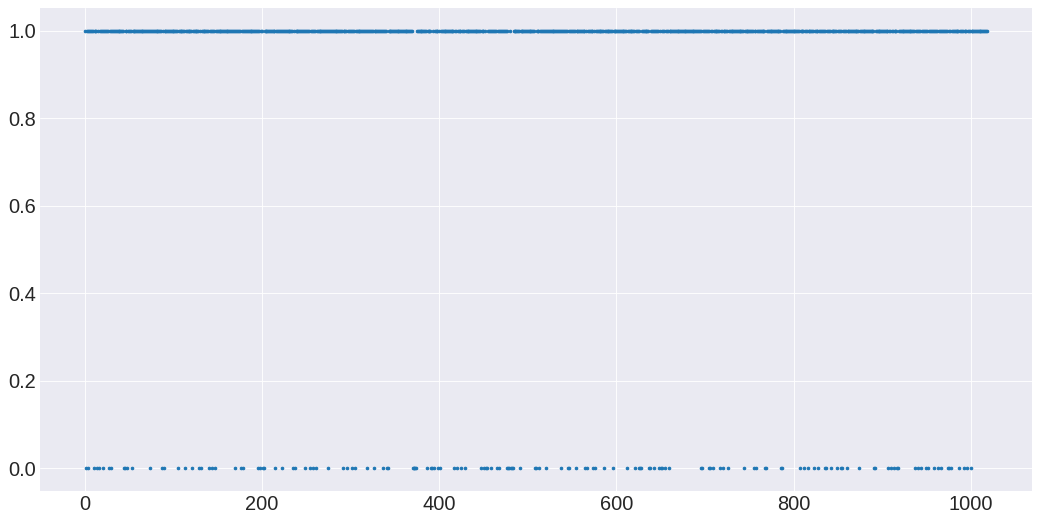

In [30]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(0, nr_guesses), correct, s=5)

In [127]:
cum_correct = np.zeros(nr_guesses-5)
for i in range(nr_guesses-5):
    cum_correct[i] = np.mean(correct[:i+5])

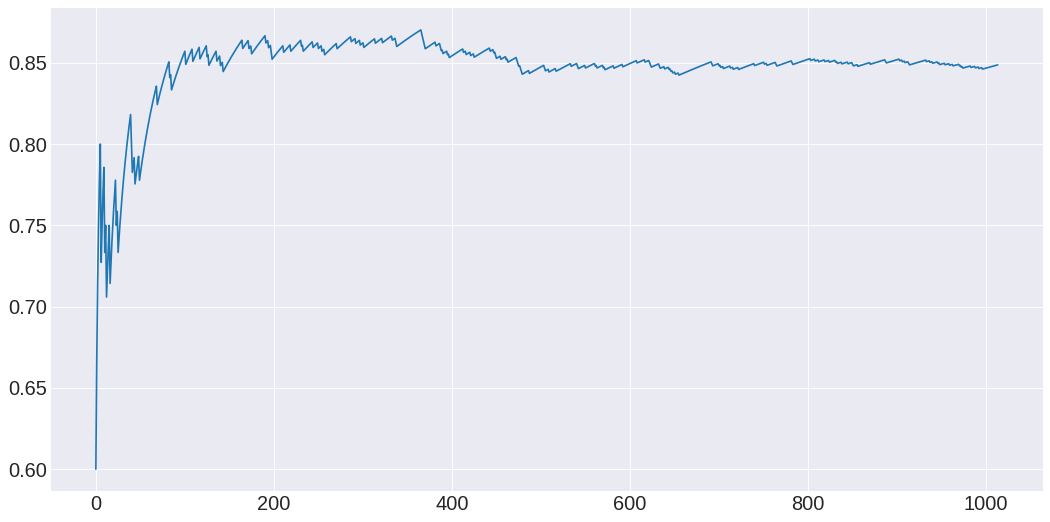

In [128]:
plt.figure(figsize=(16,8))
plt.plot(cum_correct)

In [142]:
window_size = 10
window_correct = np.zeros(nr_guesses-window_size)
for i in range(nr_guesses-window_size):
    window_correct[i] = np.mean(correct[i:i+window_size])

In [143]:
window_size = 100
df_correct = pd.DataFrame(correct)
window = df_correct.rolling(window_size, win_type="hamming", center=True, min_periods=0).mean()

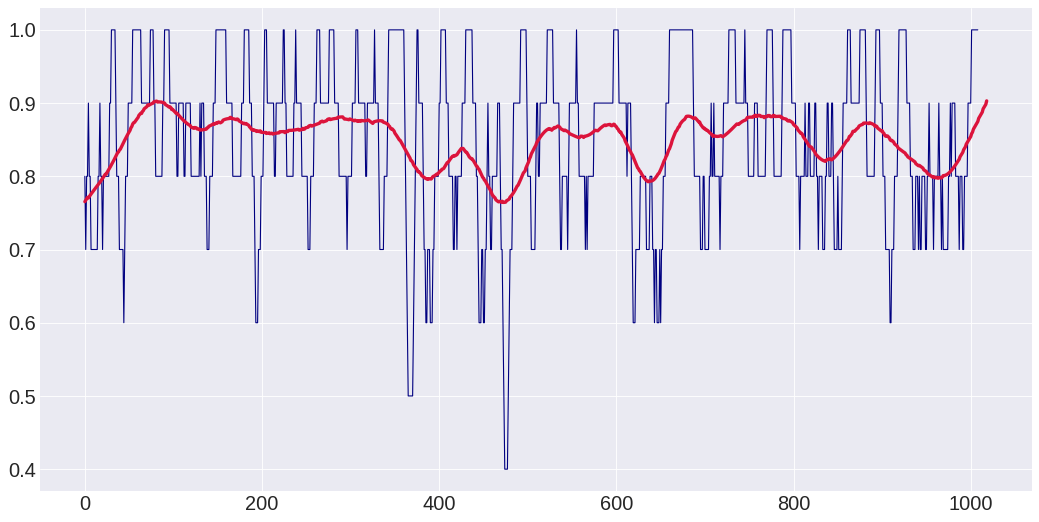

In [146]:
plt.figure(figsize=(16,8))
plt.plot(window_correct, c="navy", lw=1)
plt.plot(window, c="crimson", lw=3)